In [27]:
# # BASICS
# from time import time
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# HELPER FUNCTIONS
import my_functions as mf

# # CLASSIFIERS
from sklearn.ensemble import RandomForestClassifier

# # GRID SEARCHING
from sklearn.model_selection import RandomizedSearchCV

# # WARNINGS
import warnings
warnings.filterwarnings('ignore')

# Create Dict to Hold Dataframse

In [2]:
# ed holds the searches in case I want to refer to one later
ed = {}

# random_forest_grid keeps track of the best grid search parmeters
random_forest_grid = {}

# Read Data

In [3]:
X_train, X_test, y_train, y_test, cols = mf.load_arrays(True)

# n_estimators

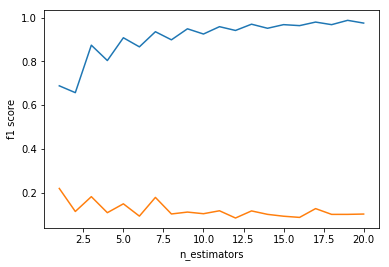

CPU times: user 8.81 s, sys: 284 ms, total: 9.09 s
Wall time: 9.48 s


In [8]:
%%time

parameter = "n_estimators"
values = range(1, 21)

ed[parameter] = mf.gridsearching(
        RandomForestClassifier(),             # Our model
        {parameter: values},                   # Values for that parameter
        X_train, y_train
)

# Plot
mf.plot_line(ed[parameter], parameter)

In [ ]:
'''
CONCLUSION: strange that f1 decreases with more trees. 
            even tress also do poorly. 
            switch from default of 10 to 7 trees
            '''

random_forest_grid["n_estimators"] = [7]

# criterion

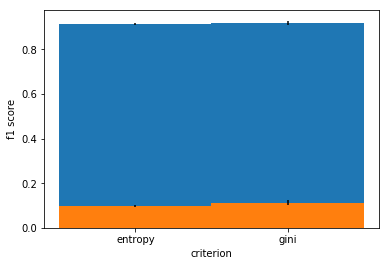

CPU times: user 1.02 s, sys: 23.6 ms, total: 1.04 s
Wall time: 1.05 s


In [9]:
%%time

parameter = "criterion"
values = ['gini','entropy']

ed[parameter] = mf.gridsearching(
        RandomForestClassifier(),             # Our model
        {parameter: values},                   # Values for that parameter
        X_train, y_train
)

mf.plot_bar(ed[parameter], parameter) 

In [10]:
'''
CONCLUSION: gini is better, but also default, so don't need to do anything
            ''';

# max_features

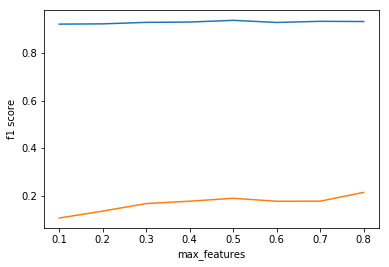

CPU times: user 12.9 s, sys: 154 ms, total: 13.1 s
Wall time: 13.3 s


In [13]:
%%time

parameter = "max_features"
values = np.arange(.1, .9, .1)

ed[parameter] = mf.gridsearching(
        RandomForestClassifier(),             # Our model
        {parameter: values},                   # Values for that parameter
        X_train, y_train
)

mf.plot_line(ed[parameter], parameter) 

In [14]:
'''
CONCLUSION: more features appear to be better
            '''

random_forest_grid["max_features"] = [.6, .7, .8, .9]

# max_depth

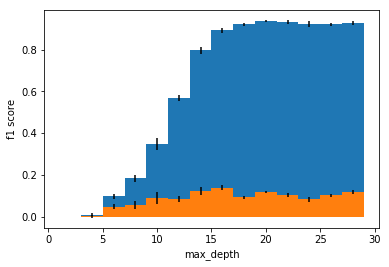

CPU times: user 4.97 s, sys: 158 ms, total: 5.13 s
Wall time: 5.25 s


In [15]:
%%time

parameter = "max_depth"
values = np.arange(2, 30, 2)

ed[parameter] = mf.gridsearching(
        RandomForestClassifier(),             # Our model
        {parameter: values},                   # Values for that parameter
        X_train, y_train
)

mf.plot_bar(ed[parameter], parameter, 2) 

In [18]:
'''
CONCLUSION: 10 to 16 look best
            '''

random_forest_grid["max_depth"] = np.arange(11, 17, 1)

# min_sample_split

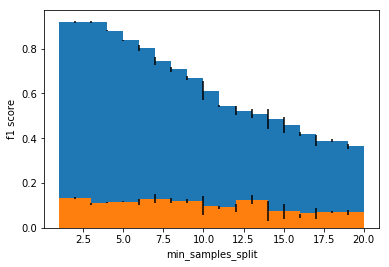

CPU times: user 7.28 s, sys: 195 ms, total: 7.48 s
Wall time: 7.78 s


In [16]:
%%time

parameter = "min_samples_split"
values = np.arange(2, 20)

ed[parameter] = mf.gridsearching(
        RandomForestClassifier(),             # Our model
        {parameter: values},                   # Values for that parameter
        X_train, y_train
)

mf.plot_bar(ed[parameter], parameter, 2)

In [17]:
'''
CONCLUSION: less is more!
            '''

random_forest_grid["min_samples_split"] = np.arange(2, 20)

# min_samples_leaf

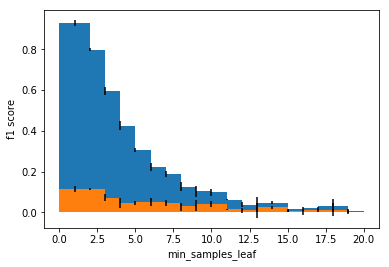

CPU times: user 7.08 s, sys: 224 ms, total: 7.3 s
Wall time: 7.65 s


In [19]:
%%time

parameter = "min_samples_leaf"
values = np.arange(1, 20)

ed[parameter] = mf.gridsearching(
        RandomForestClassifier(),             # Our model
        {parameter: values},                   # Values for that parameter
        X_train, y_train
)

mf.plot_bar(ed[parameter], parameter, 2) 

In [20]:
'''
CONCLUSION: less is still more!
            '''

random_forest_grid["min_samples_leaf"] = range(1, 5)

# max_leaf_nodes

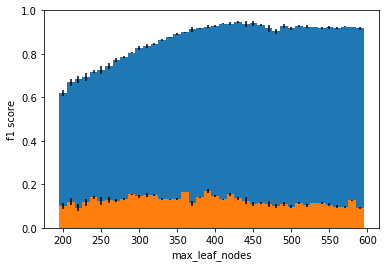

CPU times: user 15.6 s, sys: 407 ms, total: 16.1 s
Wall time: 16.3 s


In [21]:
%%time

parameter = "max_leaf_nodes"
values = np.arange(200, 600, 10)

ed[parameter] = mf.gridsearching(
        RandomForestClassifier(),             # Our model
        {parameter: values},                   # Values for that parameter
        X_train, y_train
)

mf.plot_bar(ed[parameter], parameter, 10) 

In [22]:
'''
CONCLUSION: best between 200 and 500
            '''

random_forest_grid["max_leaf_nodes"] = np.arange(200, 600, 10)

# min_impurity_split

In [ ]:
# Don't use, depreciated

# min_impurity_decrease

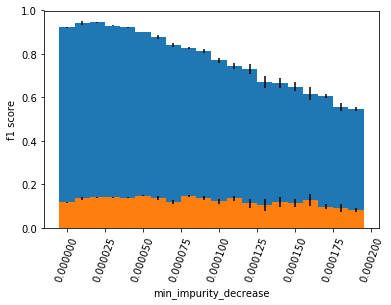

CPU times: user 7.13 s, sys: 194 ms, total: 7.32 s
Wall time: 7.42 s


In [23]:
%%time

parameter = "min_impurity_decrease"
values = np.arange(0, .0002, .00001)

ed[parameter] = mf.gridsearching(
        RandomForestClassifier(),             # Our model
        {parameter: values},                   # Values for that parameter
        X_train, y_train
)

mf.plot_bar(ed[parameter], parameter, .00001, True) 

In [24]:
'''
CONCLUSION: seems to peak at a little but not much
            '''

random_forest_grid["min_impurity_decrease"] = np.arange(0, .0001, .00001)

# class_weight

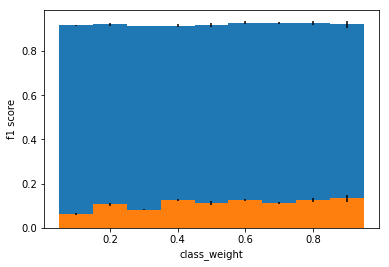

CPU times: user 3.84 s, sys: 86.6 ms, total: 3.93 s
Wall time: 3.96 s


In [28]:
%%time

parameter = "class_weight"
values = [{0:n, 1:1-n} for n in np.arange(.1, 1, .1)]

ed[parameter] = mf.gridsearching(
        RandomForestClassifier(),             # Our model
        {parameter: values},                   # Values for that parameter
        X_train, y_train
)

df = ed[parameter].copy()

df.param_class_weight = df.param_class_weight.apply(lambda x:x[0])
plt.bar(df.iloc[:,4], df.mean_train_score, width=.1, yerr=df.std_train_score)
plt.bar(df.iloc[:,4], df.mean_test_score, width=.1, yerr=df.std_train_score)

plt.xlabel(parameter)
plt.ylabel("f1 score")

plt.show()

In [29]:
'''
CONCLUSION: wow what an effect!
            '''

random_forest_grid["class_weight"] = [{0:n, 1:1-n} for n in np.arange(.6, 1, .1)]

# Bring It All Together

In [30]:
random_forest_grid

{'class_weight': [{0: 0.59999999999999998, 1: 0.40000000000000002},
  {0: 0.69999999999999996, 1: 0.30000000000000004},
  {0: 0.79999999999999993, 1: 0.20000000000000007},
  {0: 0.89999999999999991, 1: 0.10000000000000009}],
 'max_depth': array([11, 12, 13, 14, 15, 16]),
 'max_features': [0.6, 0.7, 0.8, 0.9],
 'max_leaf_nodes': array([200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320,
        330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450,
        460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590]),
 'min_impurity_decrease': array([  0.00000000e+00,   1.00000000e-05,   2.00000000e-05,
          3.00000000e-05,   4.00000000e-05,   5.00000000e-05,
          6.00000000e-05,   7.00000000e-05,   8.00000000e-05,
          9.00000000e-05]),
 'min_samples_leaf': range(1, 5),
 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19])}

In [31]:
%%time

model = RandomForestClassifier()
model = RandomizedSearchCV(model, param_distributions=random_forest_grid, scoring='f1', n_iter=100)
model.fit(X_train, y_train)

CPU times: user 2min 41s, sys: 1.59 s, total: 2min 43s
Wall time: 2min 45s


In [32]:
print(model.best_estimator_ )
print(model.best_score_)

RandomForestClassifier(bootstrap=True,
            class_weight={0: 0.59999999999999998, 1: 0.40000000000000002},
            criterion='gini', max_depth=16, max_features=0.8,
            max_leaf_nodes=490,
            min_impurity_decrease=6.0000000000000008e-05,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
0.21106290287
